In [1]:
import pandas            as pd
import numpy             as np
import scipy             as sc
import matplotlib.pyplot as plt
import matplotlib 
import seaborn           as sns


from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
from collections               import OrderedDict
from fractions                 import Fraction

get_ipython().magic(u'matplotlib inline')
matplotlib.rcParams['figure.figsize'] = (10.0, 5)

In [2]:
def plot_matrix(matrix):
    fig = plt.figure()
    ax = fig.add_subplot(111)
    cax = ax.matshow(matrix, interpolation='nearest')
    fig.colorbar(cax)

In [3]:
df = pd.read_excel('http://archive.ics.uci.edu/ml/machine-learning-databases/00352/Online%20Retail.xlsx')
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [4]:
df.shape

(541909, 8)

In [5]:
df.apply(lambda x: [x.isnull().sum(), (x.isnull().sum() * 100) / df.shape[0]])

InvoiceNo                          [0, 0.0]
StockCode                          [0, 0.0]
Description      [1454, 0.2683107311375157]
Quantity                           [0, 0.0]
InvoiceDate                        [0, 0.0]
UnitPrice                          [0, 0.0]
CustomerID     [135080, 24.926694334288598]
Country                            [0, 0.0]
dtype: object

In [6]:
df[df['CustomerID'].isnull()]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
622,536414,22139,NaN,56,2010-12-01 11:52:00,0.00,NaN,United Kingdom
1443,536544,21773,DECORATIVE ROSE BATHROOM BOTTLE,1,2010-12-01 14:32:00,2.51,NaN,United Kingdom
1444,536544,21774,DECORATIVE CATS BATHROOM BOTTLE,2,2010-12-01 14:32:00,2.51,NaN,United Kingdom
1445,536544,21786,POLKADOT RAIN HAT,4,2010-12-01 14:32:00,0.85,NaN,United Kingdom
1446,536544,21787,RAIN PONCHO RETROSPOT,2,2010-12-01 14:32:00,1.66,NaN,United Kingdom
1447,536544,21790,VINTAGE SNAP CARDS,9,2010-12-01 14:32:00,1.66,NaN,United Kingdom
1448,536544,21791,VINTAGE HEADS AND TAILS CARD GAME,2,2010-12-01 14:32:00,2.51,NaN,United Kingdom
1449,536544,21801,CHRISTMAS TREE DECORATION WITH BELL,10,2010-12-01 14:32:00,0.43,NaN,United Kingdom
1450,536544,21802,CHRISTMAS TREE HEART DECORATION,9,2010-12-01 14:32:00,0.43,NaN,United Kingdom
1451,536544,21803,CHRISTMAS TREE STAR DECORATION,11,2010-12-01 14:32:00,0.43,NaN,United Kingdom


In [7]:
df[df['Description'].isnull()]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
622,536414,22139,NaN,56,2010-12-01 11:52:00,0.0,NaN,United Kingdom
1970,536545,21134,NaN,1,2010-12-01 14:32:00,0.0,NaN,United Kingdom
1971,536546,22145,NaN,1,2010-12-01 14:33:00,0.0,NaN,United Kingdom
1972,536547,37509,NaN,1,2010-12-01 14:33:00,0.0,NaN,United Kingdom
1987,536549,85226A,NaN,1,2010-12-01 14:34:00,0.0,NaN,United Kingdom
1988,536550,85044,NaN,1,2010-12-01 14:34:00,0.0,NaN,United Kingdom
2024,536552,20950,NaN,1,2010-12-01 14:34:00,0.0,NaN,United Kingdom
2025,536553,37461,NaN,3,2010-12-01 14:35:00,0.0,NaN,United Kingdom
2026,536554,84670,NaN,23,2010-12-01 14:35:00,0.0,NaN,United Kingdom
2406,536589,21777,NaN,-10,2010-12-01 16:50:00,0.0,NaN,United Kingdom


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
InvoiceNo      541909 non-null object
StockCode      541909 non-null object
Description    540455 non-null object
Quantity       541909 non-null int64
InvoiceDate    541909 non-null datetime64[ns]
UnitPrice      541909 non-null float64
CustomerID     406829 non-null float64
Country        541909 non-null object
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


 We will also drop the rows that do not have invoice numbers and remove the credit transactions (those with invoice numbers containing C.

In [9]:
df['Description'] = df['Description'].str.strip()
df.dropna(axis=0, subset=['InvoiceNo', 'CustomerID', 'Description' ], inplace=True)
df['InvoiceNo'] = df['InvoiceNo'].astype('str')
df = df[~df['InvoiceNo'].str.contains('C')]

In [10]:
df.shape

(397924, 8)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 397924 entries, 0 to 541908
Data columns (total 8 columns):
InvoiceNo      397924 non-null object
StockCode      397924 non-null object
Description    397924 non-null object
Quantity       397924 non-null int64
InvoiceDate    397924 non-null datetime64[ns]
UnitPrice      397924 non-null float64
CustomerID     397924 non-null float64
Country        397924 non-null object
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 27.3+ MB


After the cleanup, we need to consolidate the items into 1 transaction per row with each product 1 hot encoded. For the sake of keeping the data set small,  I am only looking at sales for France. However, in additional code below, I will compare these results to sales from Germany. Further country comparisons would be interesting to investigate.

In [12]:
basket = (df[df['Country'] =="France"]
          .groupby(['InvoiceNo', 'Description'])['Quantity']
          .sum().unstack().reset_index().fillna(0)
          .set_index('InvoiceNo'))

In [13]:
pd.set_option('display.max_columns', 1543) 
basket.head()

Description  10 COLOUR SPACEBOY PEN  12 COLOURED PARTY BALLOONS  \
InvoiceNo                                                         
536370                          0.0                         0.0   
536852                          0.0                         0.0   
536974                          0.0                         0.0   
537065                          0.0                         0.0   
537463                          0.0                         0.0   

Description  12 EGG HOUSE PAINTED WOOD  12 MESSAGE CARDS WITH ENVELOPES  \
InvoiceNo                                                                 
536370                             0.0                              0.0   
536852                             0.0                              0.0   
536974                             0.0                              0.0   
537065                             0.0                              0.0   
537463                             0.0                              0.0   

Description  12 PENCIL SMALL TUBE WOODLAND  \
InvoiceNo                                    
536370                                 0.0   
536852                                 0.0   
536974                                 0.0   
537065                                 0.0   
537463                                 0.0   

Description  12 PENCILS SMALL TUBE RED RETROSPOT  12 PENCILS SMALL TUBE SKULL  \
InvoiceNo                                                                       
536370                                       0.0                          0.0   
536852                                       0.0                          0.0   
536974                                       0.0                          0.0   
537065                                       0.0                          0.0   
537463                                       0.0                          0.0   

Description  12 PENCILS TALL TUBE POSY  12 PENCILS TALL TUBE RED RETROSPOT  \
InvoiceNo                                                                    
536370                             0.0                                 0.0   
536852                             0.0                                 0.0   
536974                             0.0                                 0.0   
537065                             0.0                                 0.0   
537463                             0.0                                 0.0   

Description  12 PENCILS TALL TUBE WOODLAND  \
InvoiceNo                                    
536370                                 0.0   
536852                                 0.0   
536974                                 0.0   
537065                                 0.0   
537463                                 0.0   

Description  15CM CHRISTMAS GLASS BALL 20 LIGHTS  \
InvoiceNo                                          
536370                                       0.0   
536852                                       0.0   
536974                                       0.0   
537065                                       0.0   
537463                                       0.0   

Description  16 PIECE CUTLERY SET PANTRY DESIGN  \
InvoiceNo                                         
536370                                      0.0   
536852                                      0.0   
536974                                      0.0   
537065                                      0.0   
537463                                      0.0   

Description  18PC WOODEN CUTLERY SET DISPOSABLE  20 DOLLY PEGS RETROSPOT  \
InvoiceNo                                                                  
536370                                      0.0                      0.0   
536852                                      0.0                      0.0   
536974                                      0.0                      0.0   
537065                                      0.0                      0.0   
537463                                      0.0                 

### Item frequency plot for top 20 items sold (Quantity-wise)

In [14]:
item_freq = df[df['Country'] =="France"].groupby(['Description'])['Quantity'].sum()
item_freq.sort_values(axis = 0, ascending= False, inplace = True)

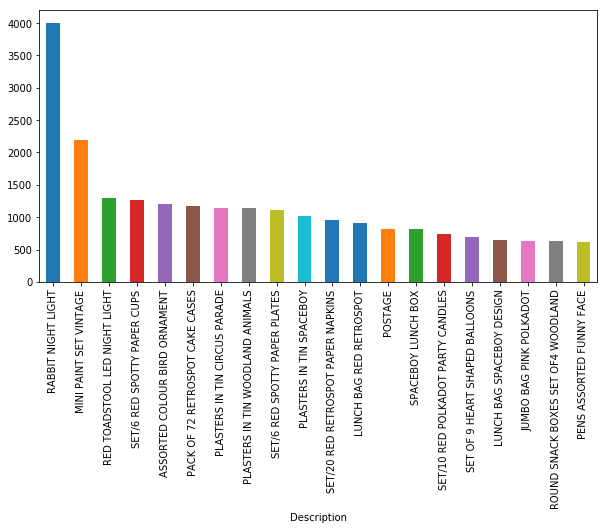

In [15]:
item_freq.head(20).plot(kind = 'bar')

There are a lot of zeros in the data but we also need to make sure any positive values are converted to a 1 and anything less the 0 is set to 0. This step will complete the one hot encoding of the data

In [16]:
def encode_units(x):
    if x <= 0:
        return 0
    if x >= 1:
        return 1

basket_sets = basket.applymap(encode_units)

Now that the data is structured properly, we can generate frequent item sets that have a support of at least 12% (this number was chosen so that I could get enough useful examples):

In [17]:
frequent_itemsets = apriori(basket_sets, min_support= 0.12, use_colnames=True)

The final step is to generate the rules with their corresponding support, confidence and lift:

In [20]:
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)

In [22]:
rules_sort = rules.sort_values(by = 'lift', ascending = False)

In [24]:
print(rules_sort.head(3).T)
print(rules_sort.shape)

                                                 12  \
antecedents           (SET/6 RED SPOTTY PAPER CUPS)   
consequents         (SET/6 RED SPOTTY PAPER PLATES)   
antecedent support                         0.138817   
consequent support                         0.128535   
support                                    0.123393   
confidence                                 0.888889   
lift                                        6.91556   
leverage                                    0.10555   
conviction                                  7.84319   

                                                 13  \
antecedents         (SET/6 RED SPOTTY PAPER PLATES)   
consequents           (SET/6 RED SPOTTY PAPER CUPS)   
antecedent support                         0.128535   
consequent support                         0.138817   
support                                    0.123393   
confidence                                     0.96   
lift                                        6.91556   
leverage 

That is all there is to it! Build the frequent items using apriori then build the rules with association_rules .

Now, the tricky part is figuring out what this tells us. For instance, we can see that there are quite a few rules with a high lift value which means that it occurs more frequently than would be expected given the number of transaction and product
combinations. 
We can also see several where the confidence is high as well. This part of the analysis is where the domain knowledge will come in handy. Since we do not have that, we shall just look for a couple of illustrative examples.
We can filter the dataframe using standard pandas code. In this case, look for a large lift (6) and high confidence (.8):

In [25]:
rules[ (rules['lift'] >= 6) &
       (rules['confidence'] >= 0.8) ]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
12,(SET/6 RED SPOTTY PAPER CUPS),(SET/6 RED SPOTTY PAPER PLATES),0.138817,0.128535,0.123393,0.888889,6.915556,0.10555,7.843188
13,(SET/6 RED SPOTTY PAPER PLATES),(SET/6 RED SPOTTY PAPER CUPS),0.128535,0.138817,0.123393,0.960000,6.915556,0.10555,21.529563


In [ ]:
rules[['antecedents','consequents']].head()

In [ ]:
x    = rules['antecedents'][:20]
y    = rules['consequents'][:20]
rules[['antecedents','consequents','support']].head(20).plot(kind = 'bar')

In looking at the rules, it seems that the green and red alarm clocks are purchased together and the red paper cups, napkins and plates are purchased together in a manner that is higher than the overall probability would suggest.
At this point, you may want to look at how much opportunity there is to use the popularity of one product to drive sales of another. For instance, we can see that we sell 340 Green Alarm clocks but only 316 Red Alarm Clocks so maybe we can drive more Red Alarm Clock sales through recommendations?

In [ ]:
print(basket['ALARM CLOCK BAKELIKE GREEN'].sum())

In [ ]:
print(basket['ALARM CLOCK BAKELIKE RED'].sum())

In [ ]:
pd.Series(rules['support'][:20]).plot(kind="bar")

In [ ]:
item_freq_df = item_freq.reset_index(level='Description', inplace = True)

In [ ]:
item_freq = pd.DataFrame(item_freq, columns = ['Description', 'Quantity'], index = ['Description'] )

In [ ]:
# take data matrix from dataframe
transaction_df     = item_freq.head(5)
transaction_df.shape

In [ ]:
transaction_df.head()

In [ ]:
transaction_matrix = transaction_df.as_matrix()
# get number of rows and columns
rows, columns = transaction_matrix.shape
# init new matrix
frequent_items_matrix = np.zeros((5,5))
# compare every product with every other
for this_column in range(0, columns-1):
    for next_column in range(this_column + 1, columns):
        # multiply product pair vectors
        product_vector = transaction_matrix[:,this_column] * transaction_matrix[:,next_column]
        # check the number of pair occurrences in baskets
        count_matches = sum((product_vector)>0)
        # save values to new matrix
        frequent_items_matrix[this_column,next_column] = count_matches
 
#print frequent_items_matrix
plot_matrix(frequent_items_matrix)

In [ ]:
sns.heatmap(frequent_items_matrix)

In [ ]:
# and finally combine product names with data
frequent_items_df = pd.DataFrame(frequent_items_matrix, columns = transaction_df.columns.values, index = transaction_df.columns.values)
 
import seaborn as sns
# and plot
sns.heatmap(frequent_items_df)

In [ ]:
transaction_matrix = basket.as_matrix()
transaction_matrix
bool_index = (transaction_matrix>0)
plot_matrix(transaction_matrix)

# get number of rows and columns
rows, columns = transaction_matrix.shape

# init new matrix

frequent_items_matrix = np.zeros((389,389))

# compare every product with every other

for this_column in range(0, columns-1):

    print( "this:", this_column,":",basket.columns[this_column])

    for next_column in range(this_column + 1, columns):

        print("\tnext:", next_column,":",basket.columns[next_column])

        # multiply product pair vectors

        product_vector = transaction_matrix[:,this_column] * transaction_matrix[:,next_column]

        # check the number of pair occurrences in baskets

        count_matches = sum((product_vector)>0)

        print( "\t", count_matches )

        # save values to new matrix

        frequent_items_matrix[this_column,next_column] = count_matches



print(frequent_items_matrix )

plot_matrix(frequent_items_matrix)

# combine matrix with names

frequent_items_df = pd.DataFrame(frequent_items_matrix, columns = basket.columns.values, index = basket.columns.values)

sns.heatmap(basket)

What is also interesting is to see how the combinations vary by country of purchase. Let’s check out what some popular combinations might be in Germany:

In [ ]:
basket2 = (df[df['Country'] =="Germany"]
          .groupby(['InvoiceNo', 'Description'])['Quantity']
          .sum().unstack().reset_index().fillna(0)
          .set_index('InvoiceNo'))

basket_sets2 = basket2.applymap(encode_units)
basket_sets2.drop('POSTAGE', inplace=True, axis=1)
frequent_itemsets2 = apriori(basket_sets2, min_support=0.05, use_colnames=True)
rules2 = association_rules(frequent_itemsets2, metric="lift", min_threshold=1)

rules2[ (rules2['lift'] >= 4) &
        (rules2['confidence'] >= 0.5)]

It seems that in addition to David Hasselhoff, Germans love Plasters in Tin Spaceboy and Woodland Animals.
In all seriousness, an analyst that has familiarity with the data would probably have a dozen different questions that this type of analysis could drive. I did not replicate this analysis for additional countries or customer combos but the overall process would be relatively simple given the basic pandas code shown above.

https://dzenanhamzic.com/2017/01/19/market-basket-analysis-mining-frequent-pairs-in-python/
https://pbpython.com/market-basket-analysis.html
https://www.listendata.com/2015/12/market-basket-analysis-with-r.html
https://www.datacamp.com/community/tutorials/market-basket-analysis-r
